## HiGHS example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the **MILPRouter with HiGHS solver**.

In [1]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter, load_repository

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

### Initialize Triton

> Note: the `load_repository()` functionality of `OptiWindNet` is used to load a prebuilt *Networkx.Graph* of the avaible locations. For more details on this functionality look into the notebook about [Load repositories containing location data](a03_load_repositories.ipynb).

In [3]:
locations = load_repository()
L = locations.triton
capacity = 8

### Optimize Triton

In [4]:
wfn = WindFarmNetwork(L=L, cables=capacity)

<Axes: >

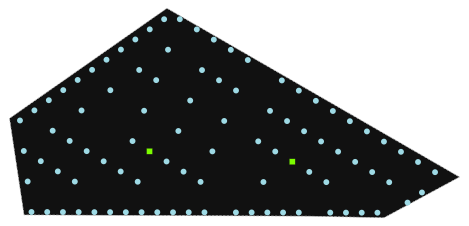

In [5]:
wfn.plot_location()

Warmstart with `EWRouter`:

In [6]:
res_pre_solver= wfn.optimize(router=EWRouter())
print(wfn.length())

117328.88088363936


In [7]:
milp_router = MILPRouter(solver_name='highs', time_limit=60, mip_gap=0.005, verbose=True)
res = wfn.optimize(router=milp_router)

✅ Using warm start: the model is initialized with the provided solution S
Running HiGHS 1.10.0 (git hash: fd86653): Copyright (c) 2025 HiGHS under MIT licence terms
RUN!
MIP  has 2618 rows; 1764 cols; 9660 nonzeros; 1764 integer variables (882 binary)
Coefficient ranges:
  Matrix [1e+00, 8e+00]
  Cost   [8e+02, 1e+04]
  Bound  [1e+00, 8e+00]
  RHS    [1e+00, 9e+01]
Assessing feasibility of MIP using primal feasibility and integrality tolerance of       1e-06
Solution has               num          max          sum
Col     infeasibilities      0            0            0
Integer infeasibilities      0            0            0
Row     infeasibilities      0            0            0
Row     residuals            0            0            0
Presolving model
2618 rows, 1764 cols, 9660 nonzeros  0s
2326 rows, 1722 cols, 8665 nonzeros  0s

MIP start solution is feasible, objective value is 113076.197044

Solving MIP model with:
   2326 rows
   1722 cols (842 binary, 880 integer, 0 implied in

In [8]:
wfn.G.SolutionInfo

SolutionInfo(runtime=<pyomo.opt.results.container.UndefinedData object at 0x000001911140DD60>, bound=104687.96341946408, objective=107705.26881811705, relgap=0.028014464211108536, termination='maxTimeLimit')

In [9]:
wfn.length()

107705.26881811705

<Axes: >

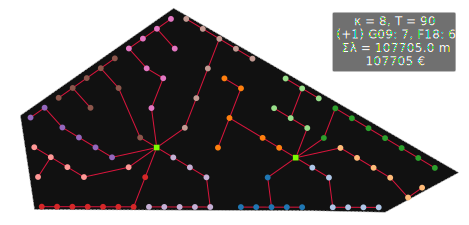

In [10]:
wfn.plot()